# Description

***In this assignment I am going to predict whether a person's income is less than 50k or more than 50k using various feature's like age ,education and occupation***

***1. Import the important Libraries***

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,  classification_report,roc_curve, auc


## Import Label encoder, label binarizer and Standard Scaler

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.metrics import f1_score

## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

***Load the Dataset***

In [17]:
df=pd.read_csv('/content/archive.zip')

In [18]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.shape

(32561, 15)

In [21]:
#as their are many ? in many columns so by replacing them by nan value we can drop that rows
df = df.replace("?",np.nan)


In [22]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(30162, 15)

In [25]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [26]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [27]:
#If their are some rows exactly same so we have to check whether any duplicate rows are present or not
df.duplicated().sum()

23

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
#duplicate values

df.duplicated().sum()

0

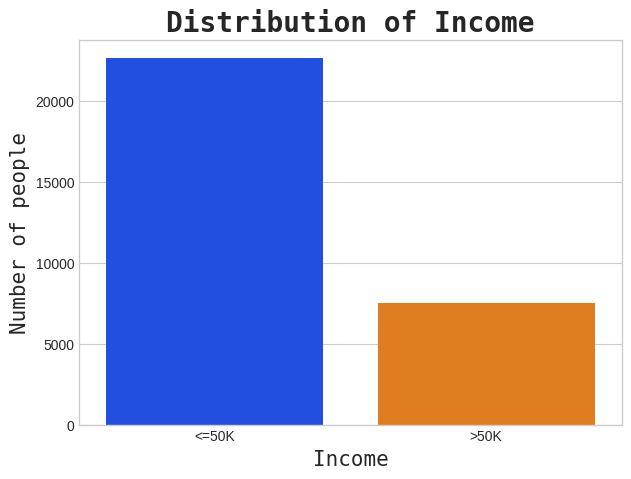

In [30]:
# Creating a barplot for 'Income'
income = df['income'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income,palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

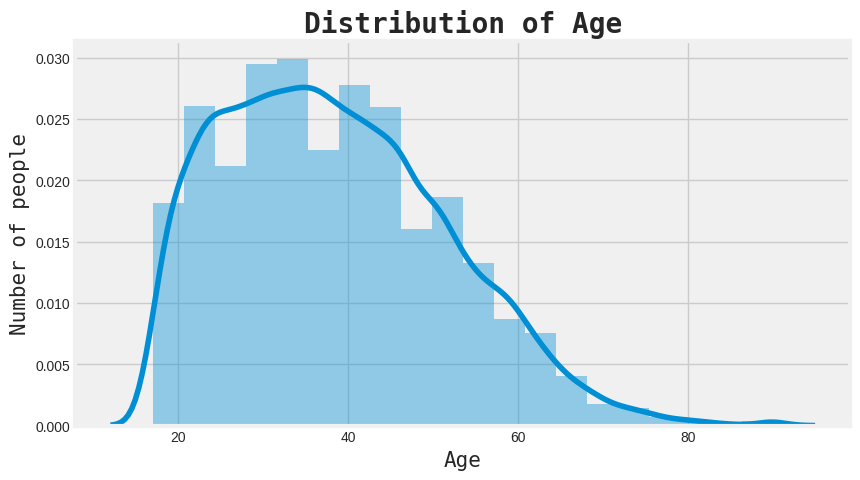

In [31]:
# Creating a distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

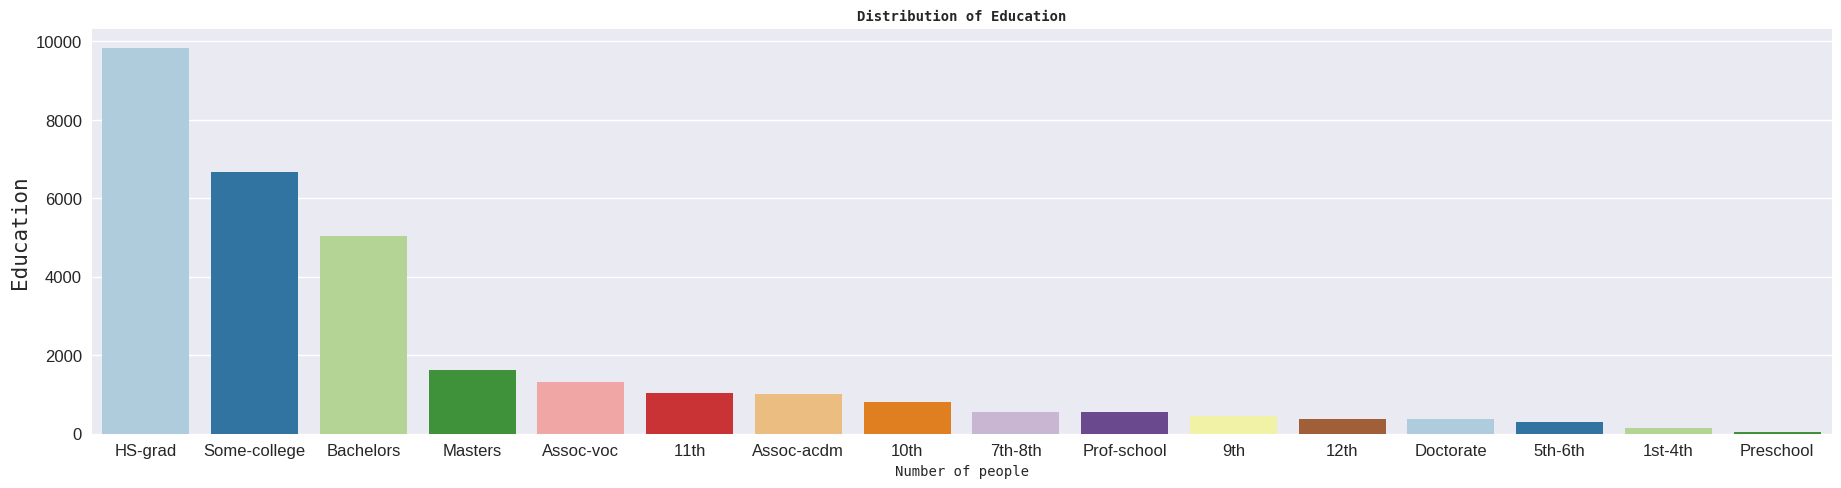

In [32]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(20, 5))
sns.barplot(edu, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 10, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

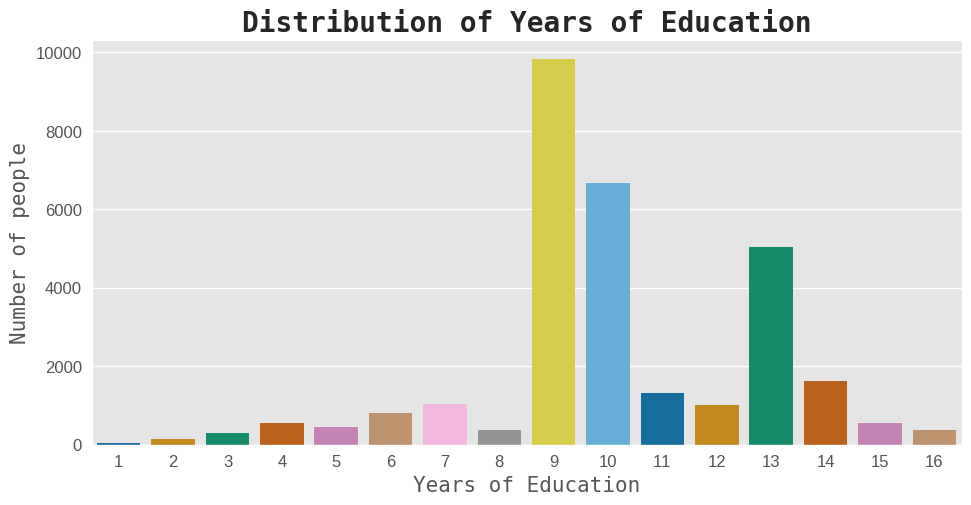

In [33]:
# Creating a barplot for 'Years of Education'
edu_num = df['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

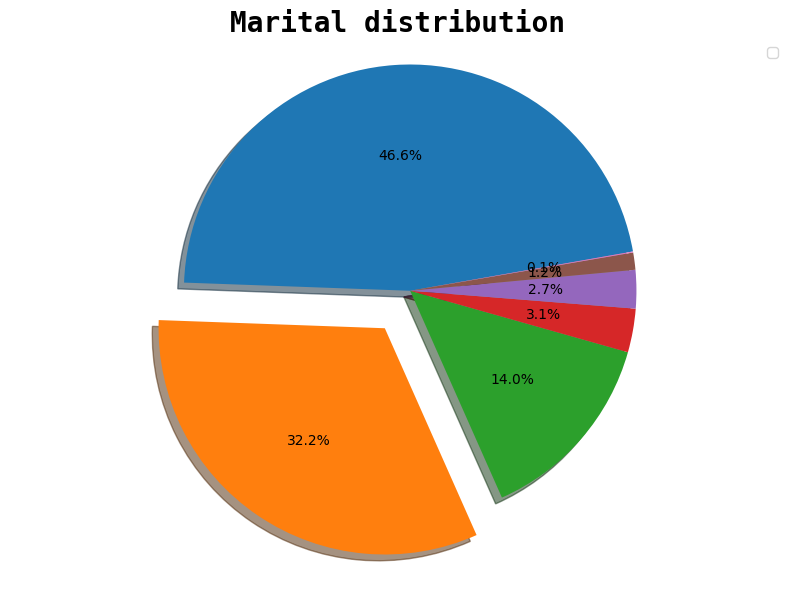

In [34]:
# Creating a pie chart for 'Marital status'
marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

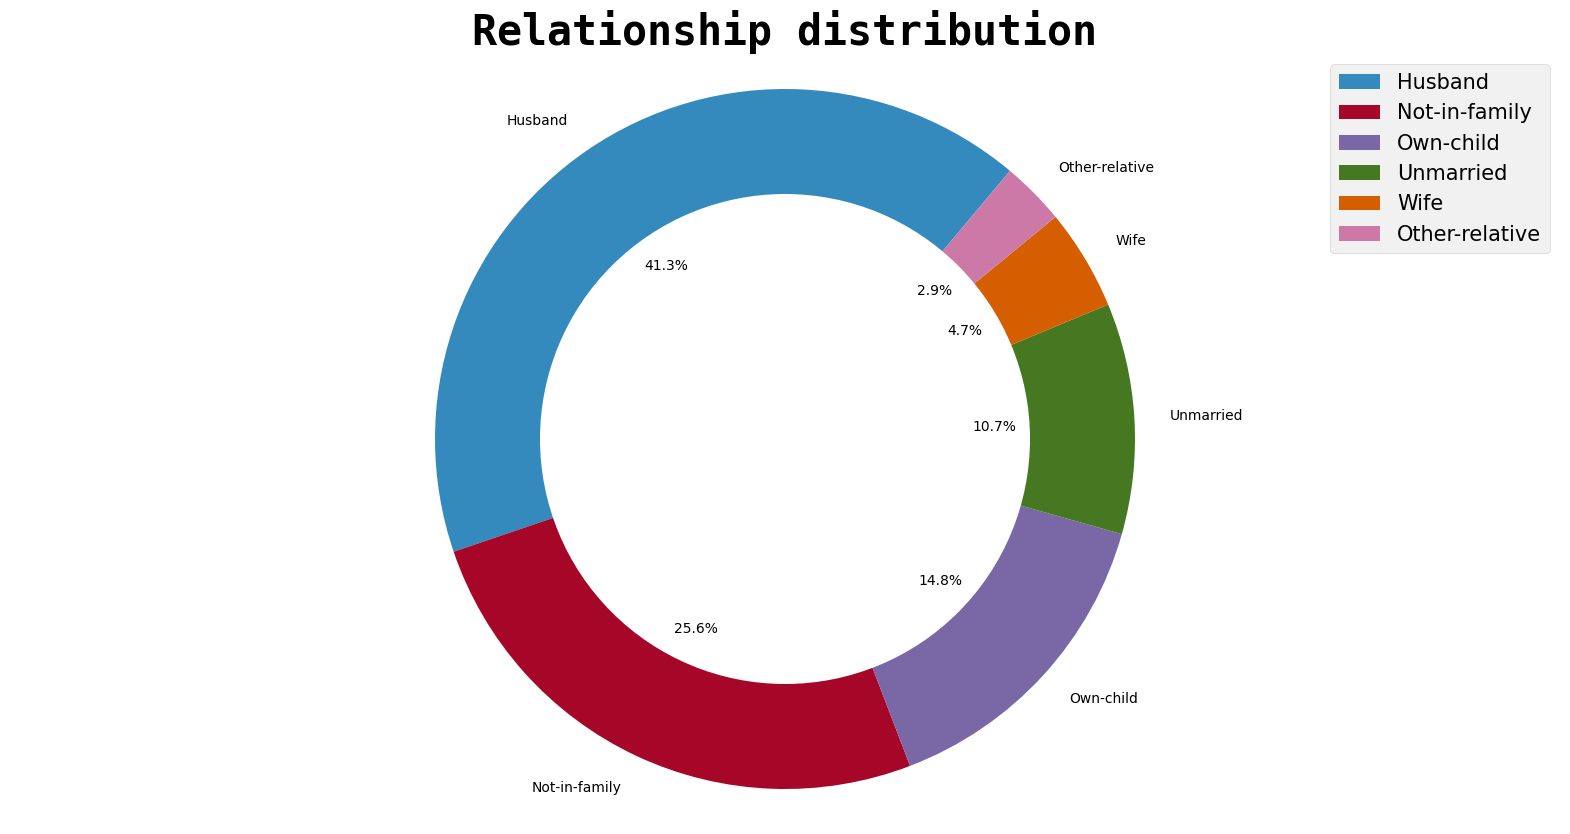

In [35]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

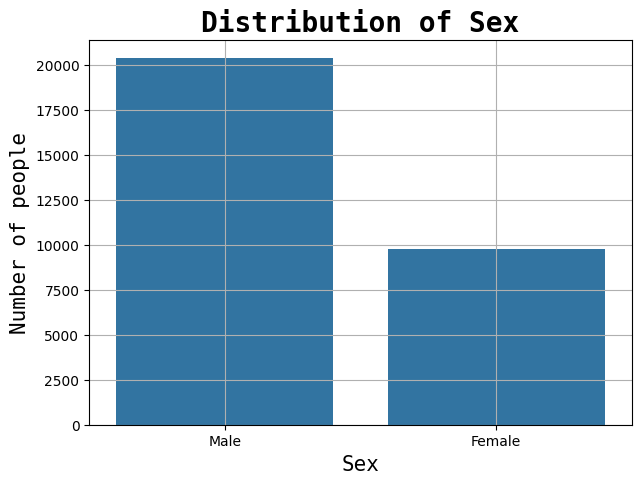

In [36]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

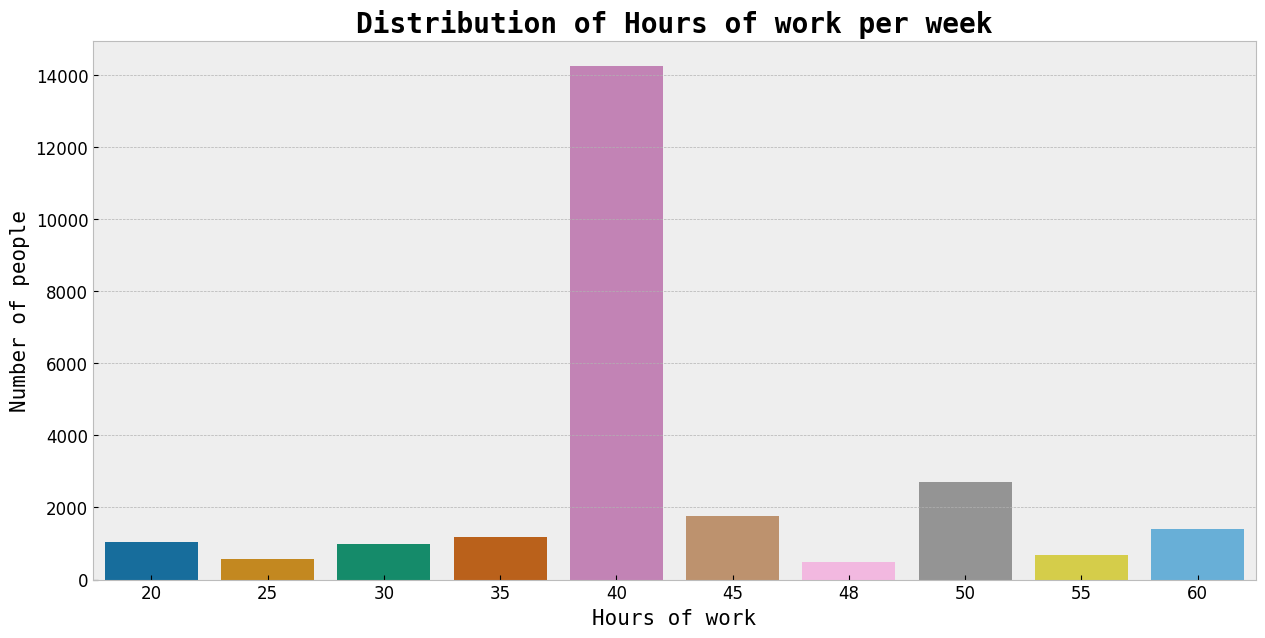

In [37]:
# Creating a barplot for 'Hours per week'
hours = df['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# Start Data Processing

**Label Encoding**

In [38]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

# Feature Selection


In [39]:
X = df.drop('income', axis=1)
Y = df['income']

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [41]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [42]:
feature_imp = selector.feature_importances_

In [43]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.62
1 4.33
2 16.66
3 3.76
4 8.7
5 7.26
6 7.74
7 9.14
8 1.46
9 3.01
10 8.65
11 2.73
12 9.4
13 1.54


In [44]:
X = X.drop(['workclass','race','marital.status', 'sex',
            'capital.loss', 'native.country'], axis=1)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

***Fixing imbalanced dataset using Oversampling***

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [48]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [49]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

***Creating a train-test split***

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [51]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (36212, 8)
X_test shape: (9054, 8)
Y_train shape: (36212,)
Y_test shape: (9054,)


# Data Modeling

# ***1.Logistic Regression***

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [53]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [54]:
Y_pred_log_reg = log_reg.predict(X_test)

In [55]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.43
F1 score: 75.21


# **2.KNN Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [57]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [58]:
Y_pred_knn = knn.predict(X_test)

In [59]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 82.8
F1 score: 83.73


# **3. Support Vector Classifier**

In [60]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [61]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [62]:
Y_pred_svc = svc.predict(X_test)

In [63]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.8
F1 score: 82.58


# 4. Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [65]:
nb.fit(X_train, Y_train)

GaussianNB()

In [66]:
Y_pred_nb = nb.predict(X_test)

In [67]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 61.92
F1 score: 41.58


# 5.Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [69]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [71]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 90.71
F1 score: 91.15


# **6.Random Forest Classifier**

In [72]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [73]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [74]:
Y_pred_ran_for = ran_for.predict(X_test)

In [75]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.0
F1 score: 92.34


# 7. XGB Classifier

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [77]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
Y_pred_xgb = xgb.predict(X_test)

In [79]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.35
F1 score: 86.75


# Hyperparameter Tuning

In [80]:
from sklearn.model_selection import  RandomizedSearchCV

In [81]:
rf_tuned = RandomForestClassifier(random_state=42)

In [97]:
n_estimators = [int(x) for x in np.linspace(start=80, stop=180, num=18)]
max_depth = [int(x) for x in np.linspace(80, 180, num=15)]

In [98]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [99]:
rf_tuned = RandomForestClassifier(random_state=42)

In [100]:

rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [101]:
rf_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [80, 87, 94, 101, 108, 115,
                                                      122, 130, 137, 144, 151,
                                                      158, 165, 172, 180],
                                        'n_estimators': [80, 85, 91, 97, 103,
                                                         109, 115, 121, 127,
                                                         132, 138, 144, 150,
                                                         156, 162, 168, 174,
                                                         180]},
                   random_state=42)

In [102]:
rf_cv.best_score_

0.9048933646492688

In [103]:
rf_cv.best_params_

{'n_estimators': 132, 'max_depth': 94}

In [104]:
rf_best = RandomForestClassifier(
    max_depth=132, n_estimators=94, random_state=42)

In [105]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=132, n_estimators=94, random_state=42)

In [106]:
Y_pred_rf_best = rf_best.predict(X_test)

In [108]:
print('Random Forest Classifier:')
print('Accuracy score:',accuracy_score(Y_test, Y_pred_rf_best))
print('F1 score:', f1_score(Y_test, Y_pred_rf_best))

Random Forest Classifier:
Accuracy score: 0.9202562403357633
F1 score: 0.9235817104149027


In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

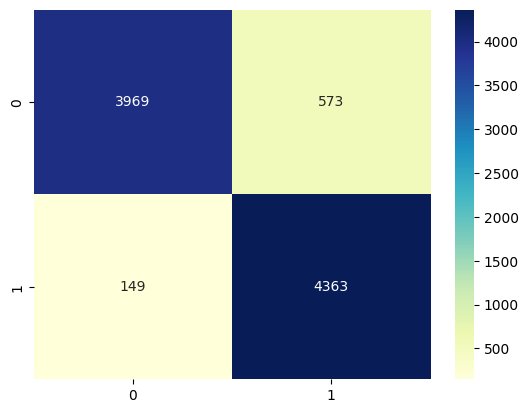

In [112]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [113]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      4542
           1       0.88      0.97      0.92      4512

    accuracy                           0.92      9054
   macro avg       0.92      0.92      0.92      9054
weighted avg       0.92      0.92      0.92      9054

